In [1]:
import sys
import configparser as cp
import numpy as np
import scipy.io
import os
import time
import multiprocessing
from driftDiffusionSimulatorBase import driftDiffusionSimulatorBase
from driftDiffusionSimulatorDome import driftDiffusionSimulatorDome
from myGeometryFunctions import *
import matplotlib.pyplot as plt
import matplotlib.path as mpltPath
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

In [2]:
initFile = 'Dome_T4_Probe0,4.25.txt'

Temp = 100
partDensity = 100
probeCenterX = 0
probeCenterY= 4.25

constrictionWidth = 0.6
pScatter = 0
sourceDrainRatio = 1.2
Nsteps = 1000
dNsave = 10
domeD = 10
injectH, injectW = 1, 5

collisionDist = 0.05
stepSize = 0.01

Ncpu = 1
outPath = './'

splitName = initFile.split('.')
if len(splitName) == 2:
    fnameBase = initFile .split('.')[0]
elif len(splitName) == 3:
    fnameBase = '.'.join([initFile .split('.')[0], initFile .split('.')[1]])
elif len(splitName) == 4:
    fnameBase = '.'.join([initFile .split('.')[0], initFile .split('.')[1], initFile .split('.')[2]])
	
print(fnameBase)

Dome_T4_Probe0,4.25


In [3]:
dSim = driftDiffusionSimulatorDome()
dSim.probeCenterX = probeCenterX
dSim.probeCenterY = probeCenterY
dSim.setConstrictionWidth(constrictionWidth)
dSim.setInjectorShape(injectW,injectH)
dSim.setDiameter(domeD)
dSim.updateScatterProb(pScatter)
dSim.Temp = Temp
dSim.particleDensity = partDensity
dSim.setSourceDrainRatio(sourceDrainRatio)
dSim.setOverlapRadius(collisionDist)
dSim.setStepSize(stepSize)

dSim.setEmin(dSim.partDensity, dSim.Temp)
dSim.calcArea()
dSim.setNpart(dSim.partDensity, dSim.Area)
dSim.updateBody()
dSim.addTip()
dSim.updateNparticles()
	

In [5]:
fnameOut = "./Dome_simulation/"+fnameBase+"/"+fnameBase+("_%03d"%0)+".npz"	
print(fnameOut)
dSim.runAndSave(Nsteps,dNsave,fnameOut)


./Dome_simulation/Dome_T4_Probe0,4.25/Dome_T4_Probe0,4.25_000.npz
0:  0.101609
10:  1.28831
20:  1.21606
30:  1.25222
40:  1.28077
50:  1.2699
60:  1.23772
70:  1.21468
80:  1.22656
90:  1.35927
100:  1.28361
110:  1.27985
120:  1.24113
130:  1.22506
140:  1.24255
150:  1.23244
160:  1.24285
170:  1.27042
180:  1.23299
190:  1.31743
200:  1.22053
210:  1.32994
220:  1.22306
230:  1.19696
240:  1.23086
250:  1.18155
260:  1.23386
270:  1.24079
280:  1.27715
290:  1.20244
300:  1.22948
310:  1.22613
320:  1.22907
330:  1.22389
340:  1.19724
350:  1.20982
360:  1.22854
370:  1.20818
380:  1.1856
390:  1.31152
400:  1.20955
410:  1.203
420:  1.18435
430:  1.15515
440:  1.16088
450:  1.19546
460:  1.17284
470:  1.23488
480:  1.20265
490:  1.177
500:  1.18449
510:  1.17017
520:  1.16663
530:  1.15615
540:  1.16622
550:  1.19025
560:  1.24821
570:  1.14524
580:  1.14104
590:  1.16093
600:  1.15358
610:  1.17029
620:  1.19292
630:  1.14868
640:  1.19032
650:  1.17095
660:  1.18482
670:  1.1881

array([-5.00000000e+00, -4.87463956e+00, -4.50484434e+00, -3.90915741e+00,
       -3.11744901e+00, -2.16941870e+00, -1.11260467e+00,  3.06161700e-16,
        1.11260467e+00,  2.16941870e+00,  3.11744901e+00,  3.90915741e+00,
        4.50484434e+00,  4.87463956e+00,  5.00000000e+00,  3.00000000e-01,
        2.50000000e+00, -2.50000000e+00, -3.00000000e-01, -5.00000000e+00,
       -5.00000000e-01, -4.72908621e-01, -3.94570255e-01, -2.73474079e-01,
       -1.22742744e-01,  4.12896727e-02,  2.00847712e-01,  3.38640786e-01,
        4.39736876e-01,  4.93180652e-01,  4.93180652e-01,  4.39736876e-01,
        3.38640786e-01,  2.00847712e-01,  4.12896727e-02, -1.22742744e-01,
       -2.73474079e-01, -3.94570255e-01, -4.72908621e-01, -5.00000000e-01,
       -5.00000000e+00])

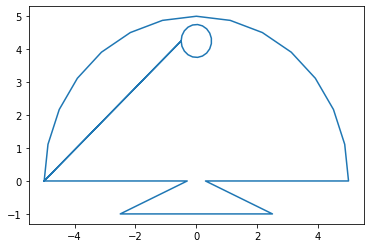

In [6]:
plt.plot(dSim.borderX, dSim.borderY)
dSim.borderX

In [11]:
print(dSim.Area)
np.pi/2*(5)**2 - np.pi*(.25)**2 + (2.5-.25) + .5

41.54481390150566


41.823558629023054